# **Prakticna implementacija projekta iz Vestacke inteligencije u medicini**

In [2]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15

In [3]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 11.2 MB/s eta 0:00:00


In [23]:
#importovanje neophodnih biblioteka za realizaciju
import numpy as np
from numpy import asarray
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm #za prikaz progress bar-a
#importovanje pytorch modula
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision
#importi za medmnist
import medmnist
from medmnist import INFO, Evaluator
from medmnist import BreastMNIST
#za iskljucivanje warninga
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#medmnist dokumentacija za kod
#dostupno na: https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb

In [24]:
#pregled dostupnih medmnist datasetova
!python -m medmnist available

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
All available datasets:
	pathmnist       | PathMNIST       | Size: 28 (default), 64, 128, 224.
	chestmnist      | ChestMNIST      | Size: 28 (default), 64, 128, 224.
	dermamnist      | DermaMNIST      | Size: 28 (default), 64, 128, 224.
	octmnist        | OCTMNIST        | Size: 28 (default), 64, 128, 224.
	pneumoniamnist  | PneumoniaMNIST  | Size: 28 (default), 64, 128, 224.
	retinamnist     | RetinaMNIST     | Size: 28 (default), 64, 128, 224.
	breastmnist     | BreastMNIST     | Size: 28 (default), 64, 128, 224.
	bloodmnist      | BloodMNIST      | Size: 28 (default), 64, 128, 224.
	tissuemnist     | TissueMNIST     | Size: 28 (default), 64, 128, 224.
	organamnist     | OrganAMNIST     | Size: 28 (default), 64, 128, 224.
	organcmnist     | OrganCMNIST     | Size: 28 (default), 64, 128, 224.
	organsmnist     | OrganSMNIST     | Size: 28 (default), 64, 128, 224.
	organmnist3d    | OrganMNIST3D    | Size: 28 (default), 64.
	nodule

In [25]:
#postavljanje odgovarajucih flegova za upotrebu BreastMNIST skupa podataka
data_flag = 'bloodmnist'
info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])
DataClass = getattr(medmnist, info['python_class'])
print(f"Info: {info} \nTask:{task}\nNumber of channels:{n_channels}\nNumber of classes:{n_classes}")
#ukoliko je vrednost za broj kanala jedan, znaci da se radi sa crno-belim slikama

Info: {'python_class': 'BloodMNIST', 'description': 'The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.', 'url': 'https://zenodo.org/records/10519652/files/bloodmnist.npz?download=1', 'MD5': '7053d0359d879ad8a5505303e11de1dc', 'url_64': 'https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1', 'MD5_64': '2b94928a2ae4916078ca51e05b6b800b', 'url_128': 'https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1', 'MD5_128': 'adace1e0ed228fccda1f39692059dd4c', 'url_224': 'https://zenodo.org/records/10519652/files/bloodmnist_2

In [26]:
# preprocesiranje i ucitavanje podataka
download = True #zelimo lokalno da sacuvamo podatke
BATCH_SIZE = 64
#posebne transformacije se koriste za treniranje, a posebne za testiranje
data_transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
data_transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
#ucitavanje podataka
train_dataset = DataClass(split='train', transform=data_transform_train, download=download, size = 224)
test_dataset = DataClass(split='test', transform=data_transform_test, download=download, size = 224)

pil_dataset = DataClass(split='train', download=download)

#enkapsulacija podataka u DataLoader
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /root/.medmnist/bloodmnist_224.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist_224.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [27]:
#pregled ucitanih podataka za skup za treniranje i testiranje
print(train_dataset)
print(test_dataset)
print(f"Number number of instances for training: {len(train_dataset)}\nNumber of instances for test:{len(test_dataset)}")

Dataset BloodMNIST of size 224 (bloodmnist_224)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License:

In [28]:
classes = info['label']
print(classes.values())

dict_values(['basophil', 'eosinophil', 'erythroblast', 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet'])


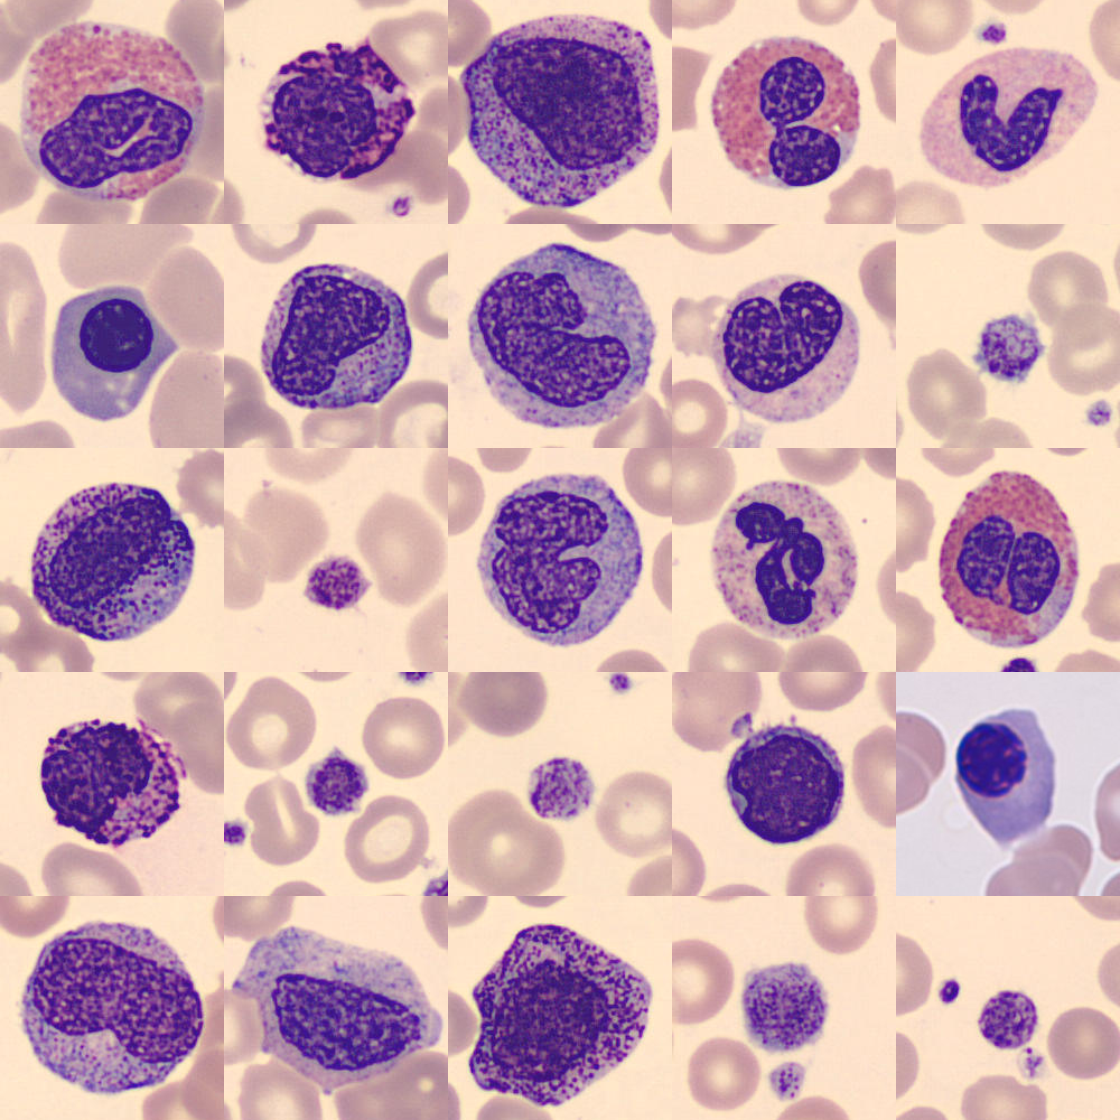

In [29]:
#vizuelizacija dela ucitanih instanci koriscenjem montage funkcije iz mednista
test_dataset.montage(length = 5)

In [30]:
#provera velicina slika, koristi se MedMnist+ verzija tako da su ucitane slike 224x224
x, y = train_dataset[0]
x.shape

torch.Size([3, 224, 224])

In [31]:
#provera da li koristimo GPU za treniranje
#po defaultu se koristi CPU, dok se ne promeni tip runtime-a u Google Colab-u
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [32]:
#ucitavanje prethodno fino podesenih modela
import torch
import torchvision.models as models
resnet50 = torch.load("/content/resnet50-fine-tuned-v3.pth") #map_location = torch.device("cpu"))
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Explainable AI - LIME & GRAD CAM primena


In [38]:
!pip install grad-cam

In [39]:
!pip install lime

In [33]:
#denormalizacija slike i prebacivanje u oblik tensora
MEAN = torch.tensor([0.5, 0.5, 0.5])
STD = torch.tensor([0.5, 0.5, 0.5])
from pytorch_grad_cam.utils.image import preprocess_image
def denormalize_img(normalized_img):
  x = normalized_img * STD[:, None, None] + MEAN[:, None, None]
  x = x.numpy().transpose(1,2,0)
  x_t = torch.tensor(x)
  x_t = x_t.unsqueeze(0)
  #vracanmo sliku u obliku tensora
  return x_t
def img_to_tensor(img):
  x = img * STD[:, None, None] + MEAN[:, None, None]
  x = x.numpy()
  x_t = torch.tensor(x)
  x_t = x_t.unsqueeze(0)
  return x_t
def img_to_numpy(img):
  x = img * STD[:, None, None] + MEAN[:, None, None]
  x = np.array(x)
  x = x.transpose(1,2,0)
  x = torch.tensor(x)
  return x

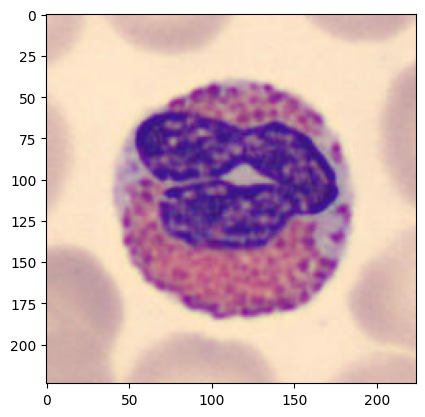

In [34]:
def get_pil_transform():
    transf = transforms.Compose([
        transforms.Resize((224, 224))
    ])
    return transf
transform = get_pil_transform()
transformed_image = transform(test_dataset[5][0])
trans_img_arr = np.array(transformed_image* STD[:, None, None] + MEAN[:, None, None])
trans_img_arr = trans_img_arr.transpose(1,2,0)
plt.imshow(trans_img_arr)

In [35]:
#provera predikcija na nivou slike
import torch.nn.functional as F
def get_predict(img):
  with torch.no_grad():
    outputs = resnet50(img)
  pred_class_id = outputs.argmax(1).item()
  probabilities = F.softmax(outputs, dim=1)
  class_names = info["label"]
  pred_class_name = class_names.get(str(pred_class_id))
  predicted_probability = probabilities[0, pred_class_id].item()
  return predicted_probability
def get_predict_top_k(img,k):
  with torch.no_grad():
    outputs = resnet50(img)
  class_names = info["label"]
  if k > len(class_names):
   return
  probabilities = F.softmax(outputs, dim=1)
  topk_prob, topk_indices = torch.topk(probabilities, k, dim=1)
  topk_class_names = [class_names.get(str(index)) for index in topk_indices]
  topk_predictions = list(zip(topk_class_names, topk_prob))
  return topk_indices

In [36]:
prob = get_predict(test_dataset[5][0].unsqueeze(0))
print(prob)

0.9999804496765137


In [37]:
prob = get_predict_top_k(test_dataset[5][0].unsqueeze(0),8)
print(prob)

tensor([[1, 0, 3, 5, 4, 6, 2, 7]])


In [ ]:
#koriscena dokumentacija za kod:
#https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images%20-%20Pytorch.ipynb

In [45]:
def get_pil_transform():
    transf = transforms.Compose([
        transforms.Resize((224, 224))
    ])

    return transf

def get_preprocess_transform():
    #normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                    #std=[0.5, 0.5, 0.5])
    transf = transforms.Compose([
        transforms.ToTensor(),
        #normalize
    ])

    return transf

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

In [53]:
def batch_predict(images):
    resnet50.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    resnet50.to(device)
    batch = batch.to(device)
    with torch.no_grad():
      logits = resnet50(batch)
    probs = F.softmax(logits, dim=1)
    predicted_classes = torch.argmax(probs, dim=1)
    #print(predicted_classes)
    return probs.detach().cpu().numpy()

In [54]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(trans_img_arr,
                                         batch_predict, # classification function
                                         top_labels=5,
                                         hide_color=0,
                                         batch_size = 10,
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/1000 [00:00<?, ?it/s]

In [55]:
explanation.top_labels

[6, 1, 5, 3, 7]

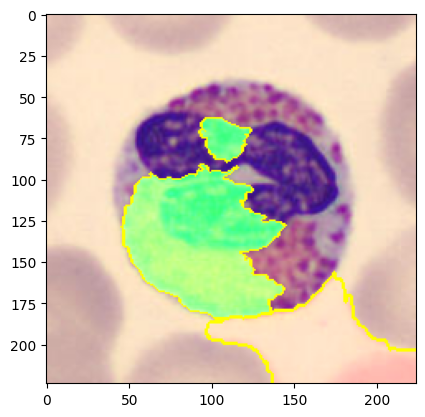

In [57]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only= False, num_features=4, hide_rest=False)
img_boundry2 = mark_boundaries(temp, mask)
plt.imshow(img_boundry2)

In [61]:
#grad-cam importi
#koriscena dokumentacija za kod:
#https://jacobgil.github.io/pytorch-gradcam-book/introduction.html
#https://jacobgil.github.io/pytorch-gradcam-book/Deep%20Feature%20Factorizations.html
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

In [58]:
def get_image_from_dataset(trang_img_arr):
    rgb_img_float = trans_img_arr
    input_tensor = preprocess_image(trans_img_arr,
                                    mean=[0.5, 0.5, 0.5],
                                    std=[0.5, 0.5, 0.5])
    return rgb_img_float, input_tensor

In [59]:
rgb_img_float, input_tensor = get_image_from_dataset(trans_img_arr)

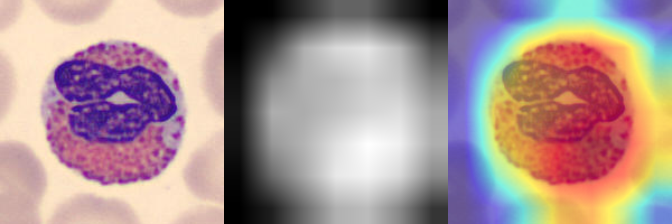

In [62]:
from PIL import Image
target_layers = [resnet50.layer4[-1]]
with GradCAM(model=resnet50,
             target_layers=target_layers) as cam:
             med_grayscale_cam = cam(input_tensor=input_tensor,targets=[ClassifierOutputTarget(1)])
             cam_image = show_cam_on_image(rgb_img_float, med_grayscale_cam[0, :], use_rgb=True)
def visualize_interpretability_results(med_grayscale_cam, cam_image):
  cam = np.uint8(255*med_grayscale_cam[0, :])
  cam = cv2.merge([cam, cam, cam])
  images = np.hstack((np.uint8(255*rgb_img_float), cam , cam_image))
  return Image.fromarray(images)
visualize_interpretability_results(med_grayscale_cam= med_grayscale_cam, cam_image = cam_image)

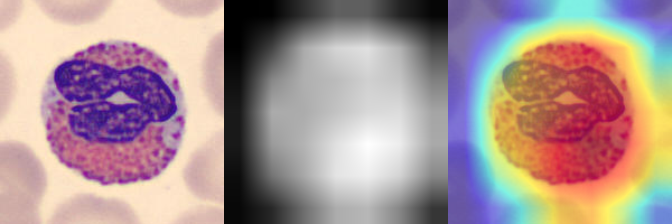

In [63]:
with GradCAMPlusPlus(model=resnet50,
             target_layers=target_layers) as cam:
             med_grayscale_cam = cam(input_tensor=input_tensor,targets=[ClassifierOutputTarget(1)])
             cam_image = show_cam_on_image(rgb_img_float, med_grayscale_cam[0, :], use_rgb=True)
visualize_interpretability_results(med_grayscale_cam= med_grayscale_cam, cam_image = cam_image)

100%|██████████| 64/64 [07:52<00:00,  7.38s/it]


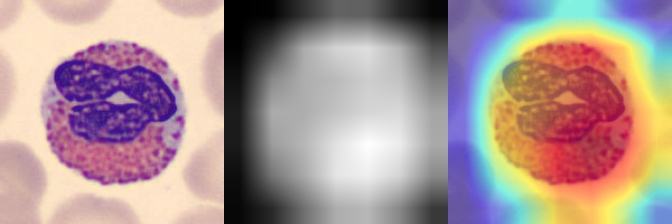

In [64]:
with AblationCAM(model=resnet50,
             target_layers=target_layers) as cam:
             med_grayscale_cam = cam(input_tensor=input_tensor,targets=[ClassifierOutputTarget(1)])
             cam_image = show_cam_on_image(rgb_img_float, med_grayscale_cam[0, :], use_rgb=True)
visualize_interpretability_results(med_grayscale_cam= med_grayscale_cam, cam_image = cam_image)

100%|██████████| 128/128 [07:15<00:00,  3.40s/it]


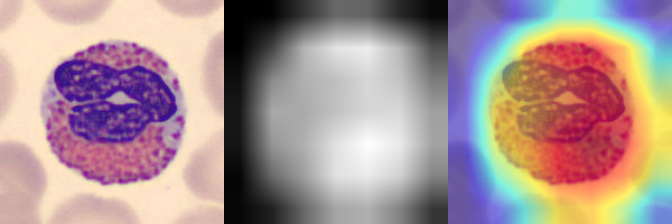

In [65]:
with ScoreCAM(model=resnet50,
             target_layers=target_layers) as cam:
             med_grayscale_cam = cam(input_tensor=input_tensor,targets=[ClassifierOutputTarget(1)])
             cam_image = show_cam_on_image(rgb_img_float, med_grayscale_cam[0, :], use_rgb=True)
visualize_interpretability_results(med_grayscale_cam= med_grayscale_cam, cam_image = cam_image)